# Setup

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [8]:
results_df = pd.read_csv('../../data/topic_model_results.csv',  lineterminator='\n', encoding='utf8')

In [9]:
results_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation\r,hateful Score,hateful HR,toxic Score,toxic HR\r,Topic Number,Topic\r
0,i think most singaporeans dont give a damn who...,11/4/2020 15:49,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.582897,0,-0.419338,0,0,Political\r
1,fair point the secrecy aspect of it slipped my...,3/4/2020 9:59,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.116736,0,-1.869363,0,4,Relationships\r
2,range,15/2/2020 15:07,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.027191,0,-0.798016,0,4,Relationships\r
3,gt this is binary thinking because you think t...,4/6/2020 7:07,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.419287,0,1.119165,1,5,Crime\r
4,boo boo poor u lmao,31/10/2020 13:52,pirorok,/r/singapore/comments/jl6abo/rsingapore_random...,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.952112,0,1.197503,1,9,Unknown\r


In [11]:
# Remove \r from column names
results_df.columns = results_df.columns.str.strip()

# Strip \r and other whitespace characters from a specific column (e.g., 'column_name')
results_df['Topic'] = results_df['Topic'].str.strip()

results_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,hateful Score,hateful HR,toxic Score,toxic HR,Topic Number,Topic
0,i think most singaporeans dont give a damn who...,11/4/2020 15:49,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.582897,0,-0.419338,0,0,Political
1,fair point the secrecy aspect of it slipped my...,3/4/2020 9:59,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.116736,0,-1.869363,0,4,Relationships
2,range,15/2/2020 15:07,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.027191,0,-0.798016,0,4,Relationships
3,gt this is binary thinking because you think t...,4/6/2020 7:07,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.419287,0,1.119165,1,5,Crime
4,boo boo poor u lmao,31/10/2020 13:52,pirorok,/r/singapore/comments/jl6abo/rsingapore_random...,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.952112,0,1.197503,1,9,Unknown


In [12]:
# rename new columns
results_df.rename(columns={
    'hateful Score': 'hateful_score',
    'hateful HR': 'hateful_prediction',
    'toxic Score': 'toxic_score',
    'toxic HR': 'toxic_prediction',
    'Topic Number': 'topic_number',
    'Topic': 'topic'
}, inplace=True)

results_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,hateful_score,hateful_prediction,toxic_score,toxic_prediction,topic_number,topic
0,i think most singaporeans dont give a damn who...,11/4/2020 15:49,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.582897,0,-0.419338,0,0,Political
1,fair point the secrecy aspect of it slipped my...,3/4/2020 9:59,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.116736,0,-1.869363,0,4,Relationships
2,range,15/2/2020 15:07,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.027191,0,-0.798016,0,4,Relationships
3,gt this is binary thinking because you think t...,4/6/2020 7:07,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.419287,0,1.119165,1,5,Crime
4,boo boo poor u lmao,31/10/2020 13:52,pirorok,/r/singapore/comments/jl6abo/rsingapore_random...,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.952112,0,1.197503,1,9,Unknown


In [15]:
# convert data to appropriate datatypes
results_df['text'] = results_df['text'].astype(str)
results_df['timestamp'] = pd.to_datetime(results_df['timestamp'], format='%d/%m/%Y %H:%M')
results_df['username'] = results_df['username'].astype(str)
results_df['link'] = results_df['link'].astype(str)
results_df['link_id'] = results_df['link_id'].astype(str)
results_df['parent_id'] = results_df['parent_id'].astype(str)
results_df['id'] = results_df['id'].astype(str)
results_df['subreddit_id'] = results_df['subreddit_id'].astype(str)
results_df['moderation'] = results_df['moderation'].tolist()
results_df['hateful_score'] = results_df['hateful_score'].astype('float32')
results_df['hateful_prediction'] = results_df['hateful_prediction'].astype('int16')
results_df['toxic_score'] = results_df['toxic_score'].astype('float32')
results_df['toxic_prediction'] = results_df['toxic_prediction'].astype('int16')
results_df['topic_number'] = results_df['topic_number'].astype('category')
results_df['topic'] = results_df['topic'].astype('category')

In [16]:
# extract date from datetime stamp
results_df['timestamp'] = results_df['timestamp'].dt.date
results_df['timestamp'].head()

0    2020-04-11
1    2020-04-03
2    2020-02-15
3    2020-06-04
4    2020-10-31
Name: timestamp, dtype: object

# 1. Hatefulness & Toxicity over Time

We tally the hatefulness and toxicity scores by day to see how the scores have changed over time

In [35]:
# count number of comments per day
num_of_comments_per_day_df = results_df.groupby('timestamp')['id'].count()

# sum hatefulness per day
hatefulness_per_day_df = results_df.groupby('timestamp')['hateful_score'].sum()

# sum toxicity per day
toxicity_per_day_df = results_df.groupby('timestamp')['toxic_score'].sum()


In [18]:
hatefulness_per_day_df.head()

timestamp
2020-01-01   -125.037277
2020-01-02   -169.058228
2020-01-03   -185.944489
2020-01-04   -153.065063
2020-01-05   -177.619736
Name: hateful_score, dtype: float32

In [22]:
toxicity_per_day_df.head()

timestamp
2020-01-01    -73.507362
2020-01-02   -101.269119
2020-01-03    -87.398125
2020-01-04    -83.484047
2020-01-05    -96.996117
Name: toxic_score, dtype: float32

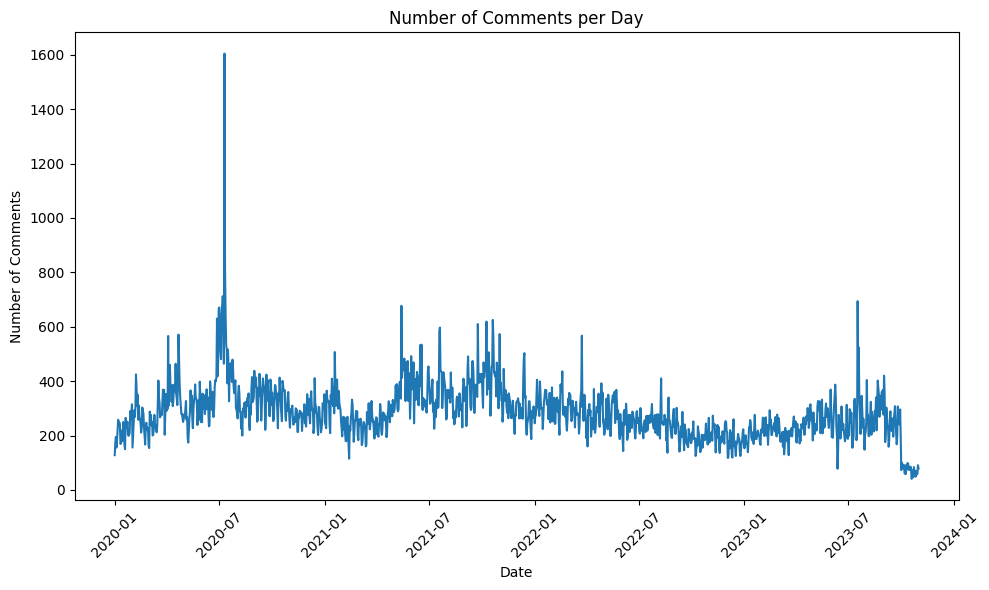

In [36]:
# plot number of comments against time
plt.figure(figsize=(10,6))
plt.plot(num_of_comments_per_day_df.index, num_of_comments_per_day_df.values)
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Number of Comments per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

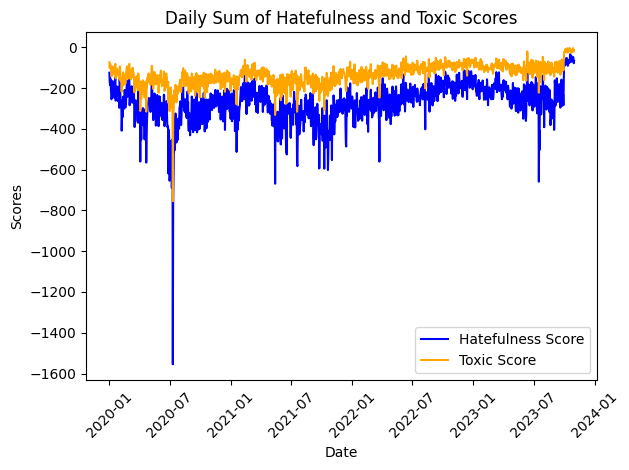

In [23]:
# Plot the first DataFrame
plt.plot(hatefulness_per_day_df.index, hatefulness_per_day_df.values, label='Hatefulness Score', color='blue')

# Plot the second DataFrame
plt.plot(toxicity_per_day_df.index, toxicity_per_day_df.values, label='Toxic Score', color='orange')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Scores')
plt.title('Daily Sum of Hatefulness and Toxic Scores')
plt.xticks(rotation=45)

# Add a legend to differentiate the lines
plt.legend()

plt.tight_layout()
plt.show()

From the Time-series plot, the daily sum of Hatefulness and Toxic scores are negative, this means that the comments on Reddit are generally not hateful and toxic. However, the graph shows that both hatefulness and toxicity has increased from 2020 to early 2024, both of which increasing by close to 100 units. The 2 lines show that both hatefulness and toxicity are strongly related, as their shapes are roughly the same.

By recalling the plot of the number of comments per day over time, it seems that the more the comments, the less the hatefulness and toxicity that day. So this isn't the most insightful.

## Average Hatefulness and Toxicity per Day

In [32]:
# Group by day and calculate the average score
average_hatefulness_and_toxicity_per_day_df = results_df.groupby(results_df['timestamp']).agg(
    average_hateful_score=('hateful_score', 'mean'), 
    average_toxic_score=('toxic_score', 'mean')
).reset_index()

In [33]:
average_hatefulness_and_toxicity_per_day_df.head()

,timestamp,average_hateful_score,average_toxic_score
0,2020-01-01,-0.976854,-0.574276
1,2020-01-02,-0.988645,-0.592217
2,2020-01-03,-0.953561,-0.448196
3,2020-01-04,-0.981186,-0.535154
4,2020-01-05,-0.986776,-0.538867


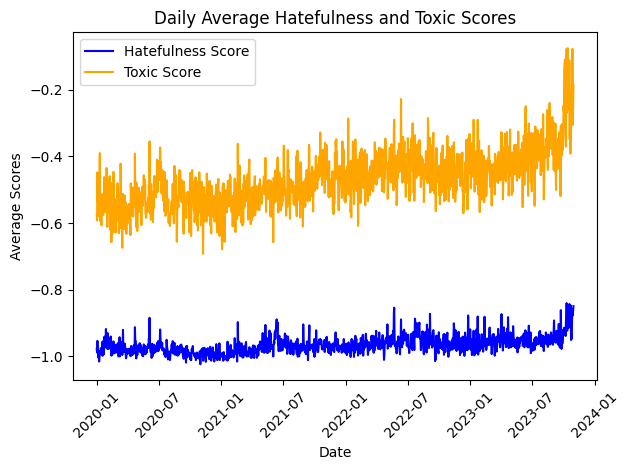

In [37]:
# Plot the first DataFrame
plt.plot(average_hatefulness_and_toxicity_per_day_df['timestamp'], average_hatefulness_and_toxicity_per_day_df['average_hateful_score'], label='Hatefulness Score', color='blue')

# Plot the second DataFrame
plt.plot(average_hatefulness_and_toxicity_per_day_df['timestamp'], average_hatefulness_and_toxicity_per_day_df['average_toxic_score'], label='Toxic Score', color='orange')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Scores')
plt.title('Daily Average Hatefulness and Toxic Scores')
plt.xticks(rotation=45)

# Add a legend to differentiate the lines
plt.legend()

plt.tight_layout()
plt.show()

By plotting the daily average hatefulness and toxic scores, we can see that both scores have increased over time. Both of which saw a sharp increase since March 2023, but especially the months of September and October that year.

## Days with Most Number of Comments

In [24]:
# number of comments sorted in descending order
sorted_num_of_comments_per_day_df = num_of_comments_per_day_df.sort_values(ascending=False)

In [25]:
sorted_num_of_comments_per_day_df.head()

timestamp
2020-07-10    1604
2020-07-11     813
2020-07-07     712
2023-07-17     694
2020-07-06     680
Name: id, dtype: int64

From this table, we can pinpoint the 2 events surrounding the 2 peaks in the number of comments: 10 July 2020 is polling day, and 17 July 2023 was the news breaking out that Speaker Tan Chuan-Jin and Tampines GRC MP Cheng Li Hui resigned over an affair.

We can double-check if the reddit comments were indeed about those events.

### Check Polling Day

In [50]:
# filter date for 10 july 2020
polling_day_df = reddit_df[reddit_df['timestamp'] == datetime.date(2020, 7, 10)]

In [57]:
# expand resolution to see full text
pd.set_option('display.max_colwidth', None)

polling_day_df['text'].head(20)

83                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              they could technically retire an mp in a smc to trigger a by election
163                                                                                                                                                                                                                                                                                                                                                                                                                                    my sense as

The text data confirms that most of Reddit comments on Polling Day (10 July 2020) were about Polling Day and singaporean politics, including how it is affecting lives of Singaporeans.

### Check 17 July 2023

In [54]:
seventeen_july_twentytwentythree_df = reddit_df[reddit_df['timestamp'] == datetime.date(2023, 7, 17)]

In [56]:
seventeen_july_twentytwentythree_df['text'].head(20)

236840                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               idk if people call me low ses i love encik tan
236844                                                                                              

Again, the text data confirms that most of Reddit comments on 17 July 2023 were about Speaker Tan Chuan-Jin and Tampines GRC MP Cheng Li Hui's affair in light of the news of their resignations.

# 2. Check for Yearly Patterns

In [71]:
pd.reset_option('display.max_colwidth')
reddit_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation\r
0,i think most singaporeans dont give a damn who...,2020-04-11,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
1,fair point the secrecy aspect of it slipped my...,2020-04-03,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
2,range,2020-02-15,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
3,gt this is binary thinking because you think t...,2020-06-04,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
4,boo boo poor u lmao,2020-10-31,pirorok,/r/singapore/comments/jl6abo/rsingapore_random...,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."


In [68]:
reddit_df_2 = reddit_df.copy()

In [70]:
print(reddit_df_2['text'].dtype)

object


In [72]:
#ensure timestamp column is datetime object
reddit_df_2['timestamp'] = pd.to_datetime(reddit_df_2['timestamp'])

# create 2 new columns in reddit_df
reddit_df_2['year'] = reddit_df_2['timestamp'].dt.year
reddit_df_2['month'] = reddit_df_2['timestamp'].dt.month

In [73]:
reddit_df_2.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation\r,year,month
0,i think most singaporeans dont give a damn who...,2020-04-11,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020,4
1,fair point the secrecy aspect of it slipped my...,2020-04-03,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020,4
2,range,2020-02-15,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020,2
3,gt this is binary thinking because you think t...,2020-06-04,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020,6
4,boo boo poor u lmao,2020-10-31,pirorok,/r/singapore/comments/jl6abo/rsingapore_random...,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020,10


In [74]:
# count number of comments by year and month 
num_of_comments_per_month_by_year_df = reddit_df_2.groupby(['year', 'month'])['id'].count().reset_index()

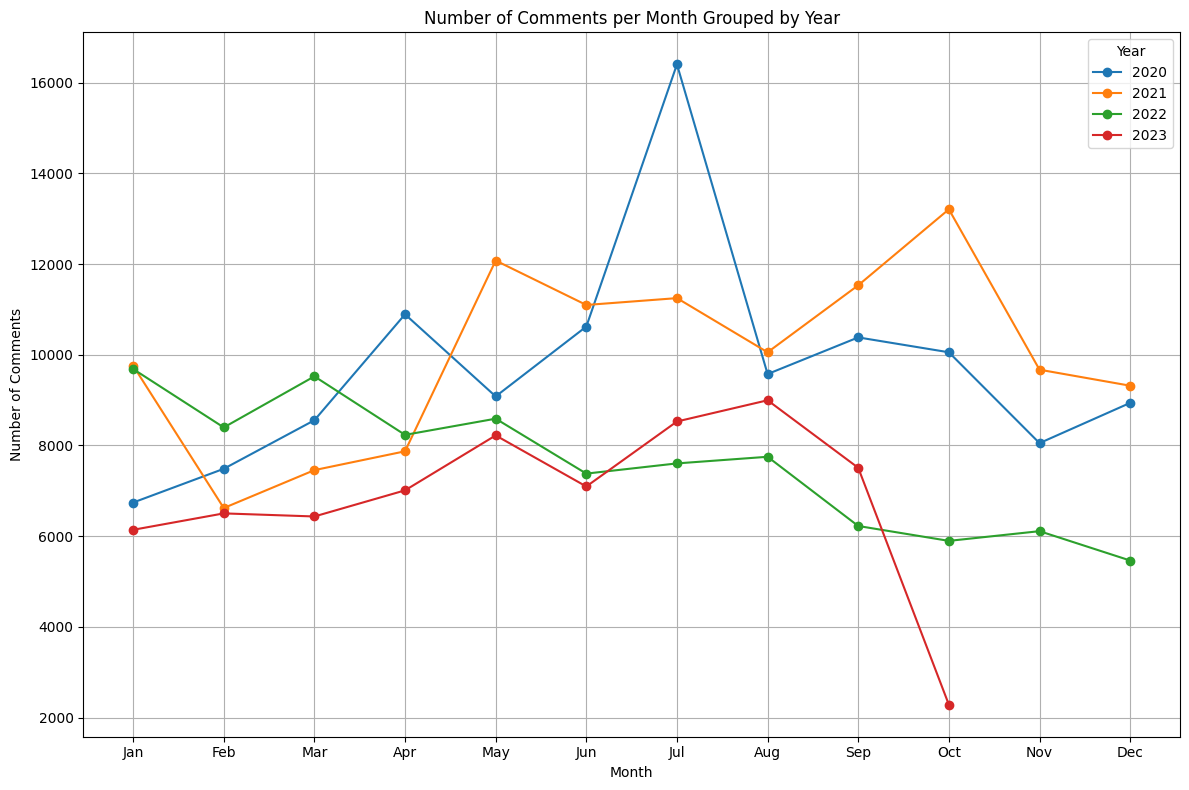

In [75]:
# Plotting
plt.figure(figsize=(12, 8))

# Loop through each year and plot number of comments per month
for year in num_of_comments_per_month_by_year_df['year'].unique():
    data_by_year = num_of_comments_per_month_by_year_df[num_of_comments_per_month_by_year_df['year'] == year]
    plt.plot(data_by_year['month'], data_by_year['id'], marker='o', label=str(year))

# Customizing the plot
plt.xlabel('Month')
plt.ylabel('Number of Comments')
plt.title('Number of Comments per Month Grouped by Year')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

The Time-series plot grouped by year and month above shows that there is not much of a seasonal pattern for when people post Reddit comments, but are more driven by events in Singapore, especially political events.

We can see a more obvious peak in October 2021. Let's take a closer look...

In [76]:
# filter comments posted in October 2021
october_twentytwentyone_df = reddit_df_2[(reddit_df_2['timestamp'] >= '2021-10-01') & (reddit_df_2['timestamp'] <= '2021-10-31')]

In [93]:
# count number of comments per day in the month of October 2021
num_of_comments_per_day_in_october_twentytwentyone_df = october_twentytwentyone_df.groupby('timestamp')['id'].count()

# sort days based on number of comments
num_of_comments_per_day_in_october_twentytwentyone_df.sort_values(ascending=False).head()

timestamp
2021-10-20    625
2021-10-09    619
2021-10-21    562
2021-10-13    506
2021-10-04    469
Name: id, dtype: int64

We see that 20 October has the most comments in October 2021. We researched online and found that this coincided with a Press Release by the COVID-19 task force of the extension of COVID-19 restrictions under the "stabilisation phase". Read here for more information: https://www.channelnewsasia.com/singapore/stabilisation-phase-restrictions-extended-nov-21-dining-social-gatherings-2256766.

In [96]:
reddit_df_2['timestamp'] = reddit_df_2['timestamp'].dt.date

# filter comments posted on 20 October 2021
twenty_october_twentytwentyone_df = reddit_df_2[reddit_df_2['timestamp'] == datetime.date(2021, 10, 20)]

We take a closer look at the comments themselves to confirm our suspicions...

In [98]:
twenty_october_twentytwentyone_df['text'].head(20)

2927                                                                                                                                                                            spitting facts but its wasted on fools here \n\nsincerely though do what you can quit when you have to you dont owe this country and its people any more sg society can go to hell in a handbasket for all any of us care the difference is you and your family members who are hcws will definitely be welcome to emigrate anywhere in the world and get paidtreated better than sg
3833                                                                                                                                                                                                                                                                                                                                                                                                                                                               

By analysing the comments of this day. we can see some comments about the COVID-19 restrictions, though not as prevalent as compared to the first 2 events.

Other miscellaneous comments that can be found here are about relationship issues and public transport.

# Conclusion

These Time-series plots show that there Reddit comments are more driven by events in Singapore, especially political events and events that affect Singaporeans' way of life.